# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 266 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 67.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 39.0 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 60.4 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 67.9 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 62.6 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=2ebd3bf54b9c0ec38064dbfbf1164b90bb4331e533b78da508e0a60f395f7f4d
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [41]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

# Create training set and define training dataloader
train = datasets.MNIST(root="data/", train=True, download=True, transform=transform)
train_loader = DataLoader(train, batch_size=100, shuffle=True)

# Create test set and define test dataloader
test = datasets.MNIST(root="data/", train=False, download=True, transform=transform)
test_loader = DataLoader(test, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The images are converted into PyTorch tensors and are normalized too.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


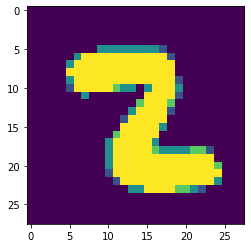

1


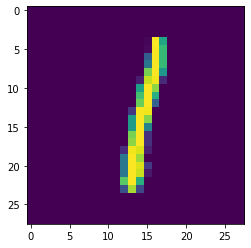

9


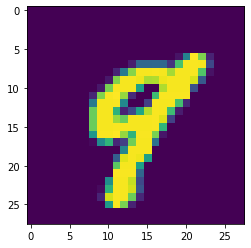

5


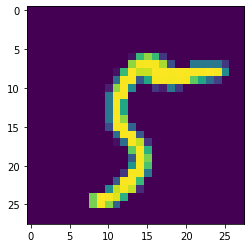

5


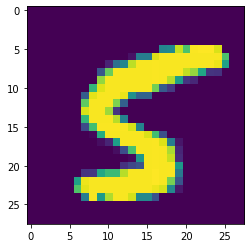

In [8]:
# Explore data
# Remove any normalization
display = datasets.MNIST(root="data/", train=True, download=False, transform=transforms.ToTensor())
display_loader = DataLoader(train, batch_size=32, shuffle=True)
show5(display_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [38]:
# Check tensor size
data, label = next(iter(train_loader))
print(data.size())

torch.Size([250, 1, 28, 28])


In [58]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # Flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Model()

In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [71]:
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [72]:
epochs = 10

train_loss_hist = list()

# Training loop
for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Calculate loss and backpropogation
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Predictions
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1}: Training accuracy: {train_correct/len(train_loader):.2f}%, Training loss: {train_loss/len(train_loader):.5f}')
    train_loss_hist.append(train_loss/len(train_loader))

Epoch 1: Training accuracy: 99.09%, Training loss: 0.02658
Epoch 2: Training accuracy: 99.14%, Training loss: 0.02484
Epoch 3: Training accuracy: 99.32%, Training loss: 0.02163
Epoch 4: Training accuracy: 99.28%, Training loss: 0.02128
Epoch 5: Training accuracy: 99.32%, Training loss: 0.01918
Epoch 6: Training accuracy: 99.35%, Training loss: 0.01887
Epoch 7: Training accuracy: 99.28%, Training loss: 0.02095
Epoch 8: Training accuracy: 99.37%, Training loss: 0.01780
Epoch 9: Training accuracy: 99.33%, Training loss: 0.01942
Epoch 10: Training accuracy: 99.26%, Training loss: 0.01988


Plot the training loss (and validation loss/accuracy, if recorded).

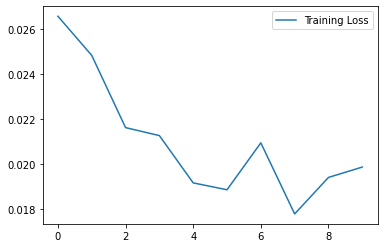

In [73]:
plt.plot(train_loss_hist, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [74]:
correct_preds = 0
total_preds = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_preds += labels.size(0)
    correct_preds += (preds == labels).sum().item()
    accuracy = (correct_preds / total_preds) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.76%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [75]:
# Trying different optimizer with custom momentum and learning decay
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay= 1e-5)

In [76]:
epochs = 10
# Second list for comparing loss
train_loss_hist2 = list()

# Training loop
for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Calculate loss and backpropogation
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Predictions
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1}: Training accuracy: {train_correct/len(train_loader):.2f}%, Training loss: {train_loss/len(train_loader):.5f}')
    train_loss_hist2.append(train_loss/len(train_loader))

Epoch 1: Training accuracy: 99.79%, Training loss: 0.00659
Epoch 2: Training accuracy: 99.90%, Training loss: 0.00391
Epoch 3: Training accuracy: 99.95%, Training loss: 0.00307
Epoch 4: Training accuracy: 99.96%, Training loss: 0.00266
Epoch 5: Training accuracy: 99.97%, Training loss: 0.00239
Epoch 6: Training accuracy: 99.97%, Training loss: 0.00218
Epoch 7: Training accuracy: 99.98%, Training loss: 0.00203
Epoch 8: Training accuracy: 99.98%, Training loss: 0.00191
Epoch 9: Training accuracy: 99.98%, Training loss: 0.00182
Epoch 10: Training accuracy: 99.98%, Training loss: 0.00173


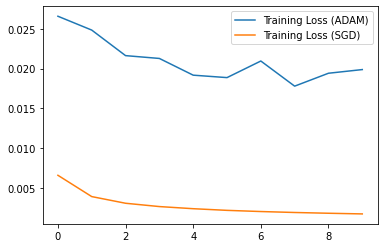

In [77]:
plt.plot(train_loss_hist, label="Training Loss (ADAM)")
plt.plot(train_loss_hist2, label="Training Loss (SGD)")
plt.legend()
plt.show()

Clear improvement is visible

In [78]:
correct_preds = 0
total_preds = 0

for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.to(device), labels.to(device)
        
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    total_preds += labels.size(0)
    correct_preds += (preds == labels).sum().item()
    accuracy = (correct_preds / total_preds) * 100
    
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 98.12%


## Saving your model
Using `torch.save`, save your model for future loading.

In [79]:
torch.save(model.state_dict(), 'model.pth')